<a href="https://colab.research.google.com/github/SamarthGarg09/K-means_clustering/blob/main/Banknote_authentication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Importing Dataset

In [1]:
from google.colab import files
upload = files.upload()

Saving Banknote-authentication-dataset.csv to Banknote-authentication-dataset.csv


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.cluster import KMeans

Load the dataset

## **V1. variance of Wavelet Transformed image (continuous)**

##**V2. skewness of Wavelet Transformed image (continuous)**

In [5]:
df = pd.read_csv('Banknote-authentication-dataset.csv')
df
v1 = df.V1
v2 = df.V2

##Describe the dataset

In [16]:

# mean
v1_arr = np.array(v1)
v2_arr = np.array(v2)
df_arr = np.array(df)
mean = np.mean(df_arr,axis = 0)
std = np.std(df_arr,axis = 0)
print(mean,std)

[0.43373526 1.92235312] [2.84172641 5.86690749]




*   2 columns (V1,V2)->no.of features = 2
*   1372 rows
*   dtype = object
*   means = [0.43373526 1.92235312]
*   std = [2.84172641 5.86690749]



##Identifying the outliers

<Figure size 1440x1440 with 0 Axes>

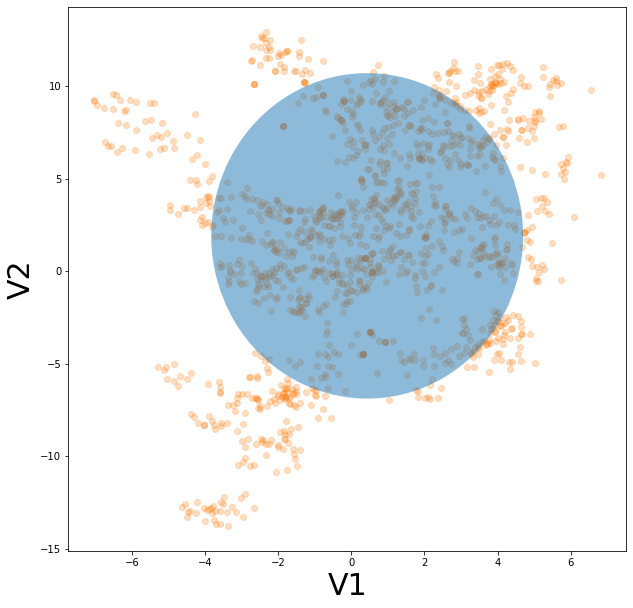

In [36]:
plt.figure(figsize = (20,20))
figure,graph = plt.subplots(figsize = (10,10))
ellipse = patches.Ellipse([mean[0],mean[1]],std[0]*3,std[1]*3,alpha = 0.5)

graph.scatter(v1_arr,v2_arr,c='#ff7f0e',alpha = 0.25)
graph.add_patch(ellipse)
plt.xlabel("V1",fontsize = 30)
plt.ylabel("V2",fontsize = 30)
plt.show()


Outside the ellipse lies some outliers

### Normalize the data(Domain standardization)

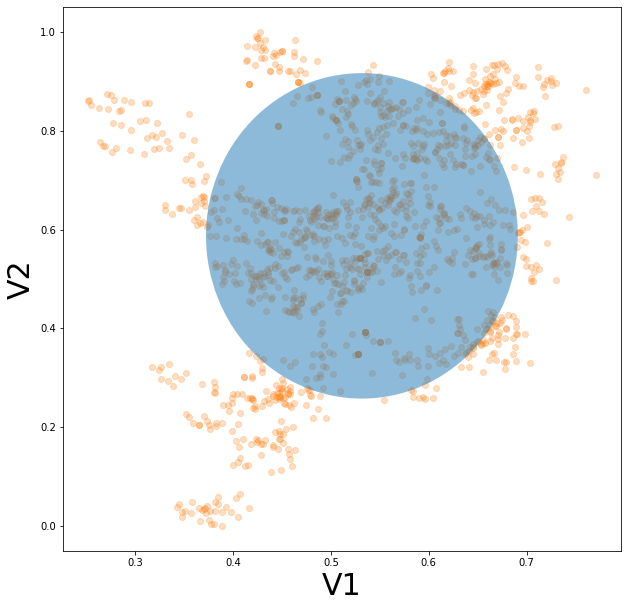

In [38]:
mi_ = np.min(df_arr)
ma_ = np.max(df_arr)

df_normalize = (df_arr-mi_)/(ma_-mi_)

mean_norm = np.mean(df_normalize,axis = 0)
std_norm = np.std(df_normalize,axis = 0)

figure,graph = plt.subplots(figsize = (10,10))
ellipse = patches.Ellipse([mean_norm[0],mean_norm[1]],std_norm[0]*3,std_norm[1]*3,alpha = 0.5)

graph.scatter(df_normalize[:,0],df_normalize[:,1],c='#ff7f0e',alpha = 0.25)
graph.add_patch(ellipse)
plt.xlabel("V1",fontsize = 30)
plt.ylabel("V2",fontsize = 30)
plt.show()

### Evaluate if the given dataset is suitable for the K-Means clustering task.

In [70]:
kmeans = KMeans(n_clusters=3).fit(df_normalize)
centroids = kmeans.cluster_centers_
# predict = kmeans.predict()
centroids

array([[0.56142668, 0.8278997 ],
       [0.53262194, 0.56049048],
       [0.48053476, 0.25610475]])

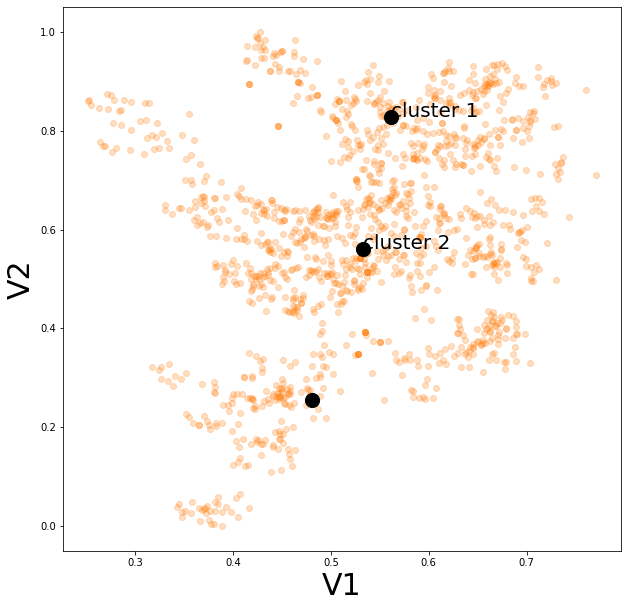

In [71]:
figure,graph = plt.subplots(figsize = (10,10))
ellipse = patches.Ellipse([mean_norm[0],mean_norm[1]],std_norm[0]*3,std_norm[1]*3,alpha = 0.5)

graph.scatter(df_normalize[:,0],df_normalize[:,1],c='#ff7f0e',alpha = 0.25)
graph.scatter(centroids[:,0],centroids[:,1],c = 'black',s = 200)
plt.text(centroids[0][0],centroids[0][1],"cluster 1",fontsize = 20)
plt.text(centroids[1][0],centroids[1][1],"cluster 2",fontsize = 20)
# graph.add_patch(ellipse)
plt.xlabel("V1",fontsize = 30)
plt.ylabel("V2",fontsize = 30)
plt.show()

Predicting clusters for datapoints

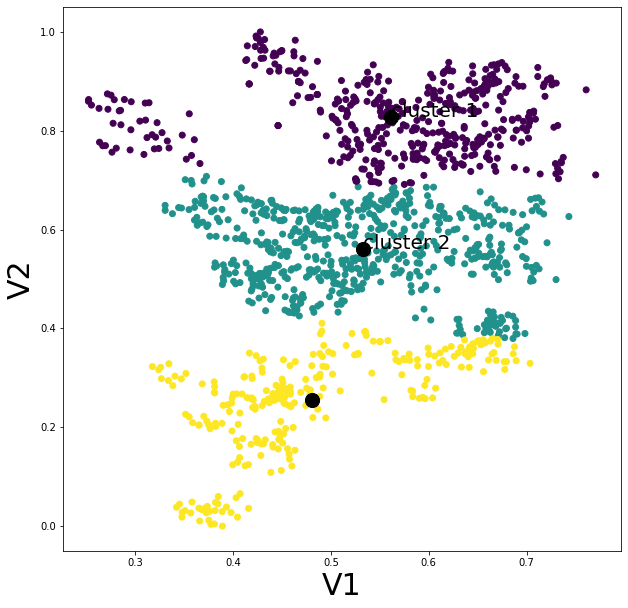

In [72]:
y_pred = kmeans.predict(df_normalize)

# plt.figure(figsize = (10,10))
figure,graph = plt.subplots(figsize = (10,10))
graph.scatter(df_normalize[:, 0], df_normalize[:, 1], c=y_pred)
graph.scatter(centroids[:,0],centroids[:,1],c = 'black',s = 200)
plt.text(centroids[0][0],centroids[0][1],"cluster 1",fontsize = 20)
plt.text(centroids[1][0],centroids[1][1],"cluster 2",fontsize = 20)
plt.xlabel("V1",fontsize = 30)
plt.ylabel("V2",fontsize = 30)
plt.show()

* If Skewness is greater than 0.58(approxly.) than data point is lying in cluster2, else in cluster1. 
* Varience is not the criteria to decide the clusters.